### –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

### –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞

–î–∞–Ω–Ω—ã–µ —Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –∏–∑ CSV-—Ñ–∞–π–ª–∞ –∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É—é—Ç—Å—è –≤ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—ã–º –∏—Ç–æ–≥–æ–º (cumulative sum).
–ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ Seaborn –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

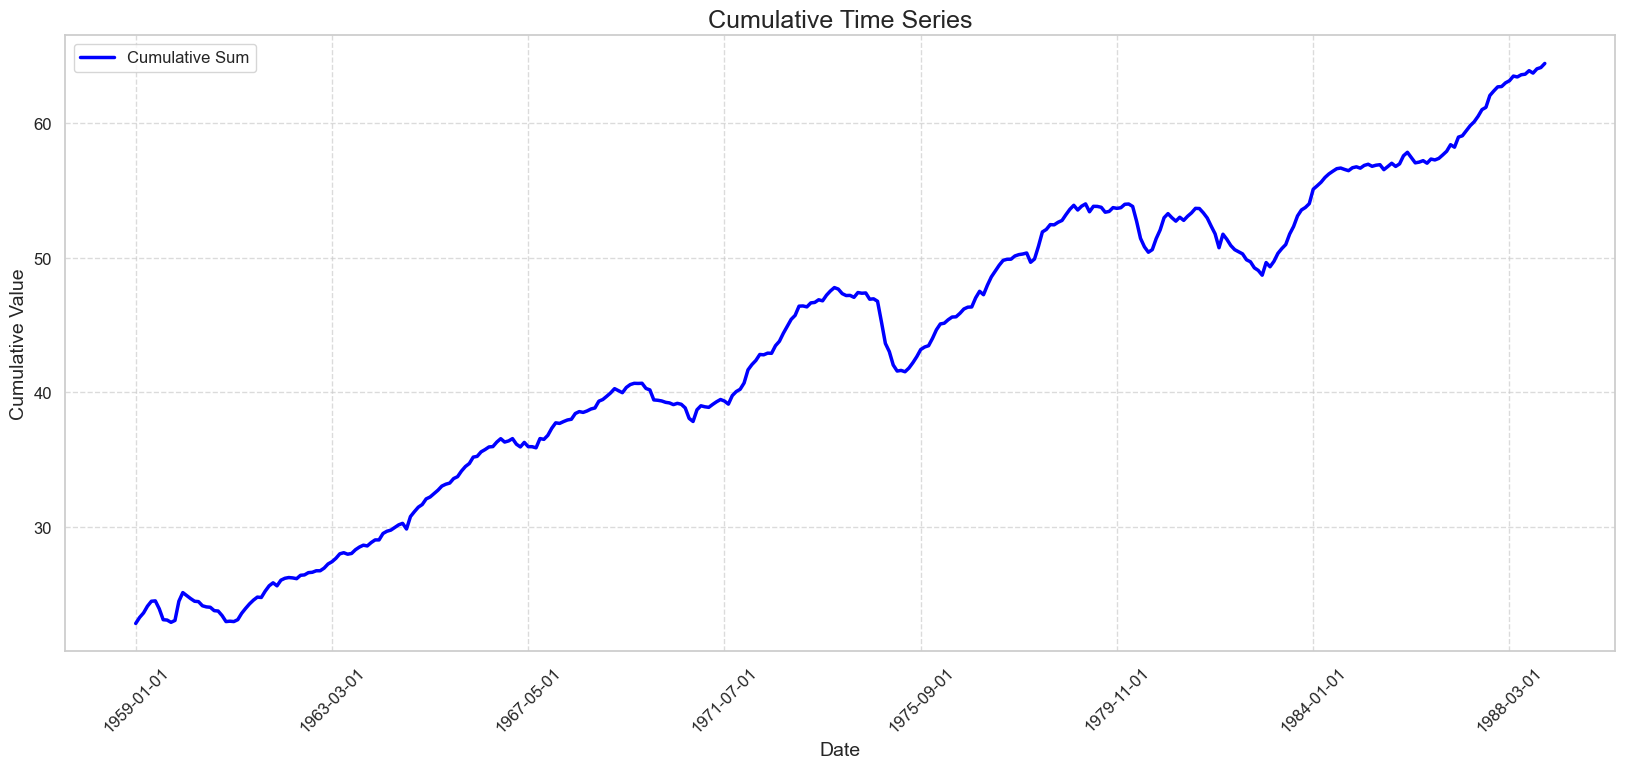

In [3]:
sns.set_theme(style="whitegrid")

data = pd.read_csv('training.csv')
ts = pd.Series(np.asarray(data['Value'], dtype=np.float64), index=data['Date'])
ts.cumsum()

plt.figure(figsize=(20, 8))
ts.plot(color="blue", linewidth=2.5, label="Cumulative Sum")

plt.title('Cumulative Time Series', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∫–æ–ª—å–∑—è—â–∏—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫

–§—É–Ω–∫—Ü–∏—è stats_plot —Å—Ç—Ä–æ–∏—Ç —Ç—Ä–∏ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞:

–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Ä—è–¥ (Original Row) ‚Äî –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.
–°–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ (Rolling Mean) ‚Äî –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ç—Ä–µ–Ω–¥ –¥–∞–Ω–Ω—ã—Ö, –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–π —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –æ–∫–Ω–∞ –≤ 12 —Ç–æ—á–µ–∫.
–°–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ (Rolling Standard Deviation) ‚Äî –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –≤–æ –≤—Ä–µ–º–µ–Ω–∏.

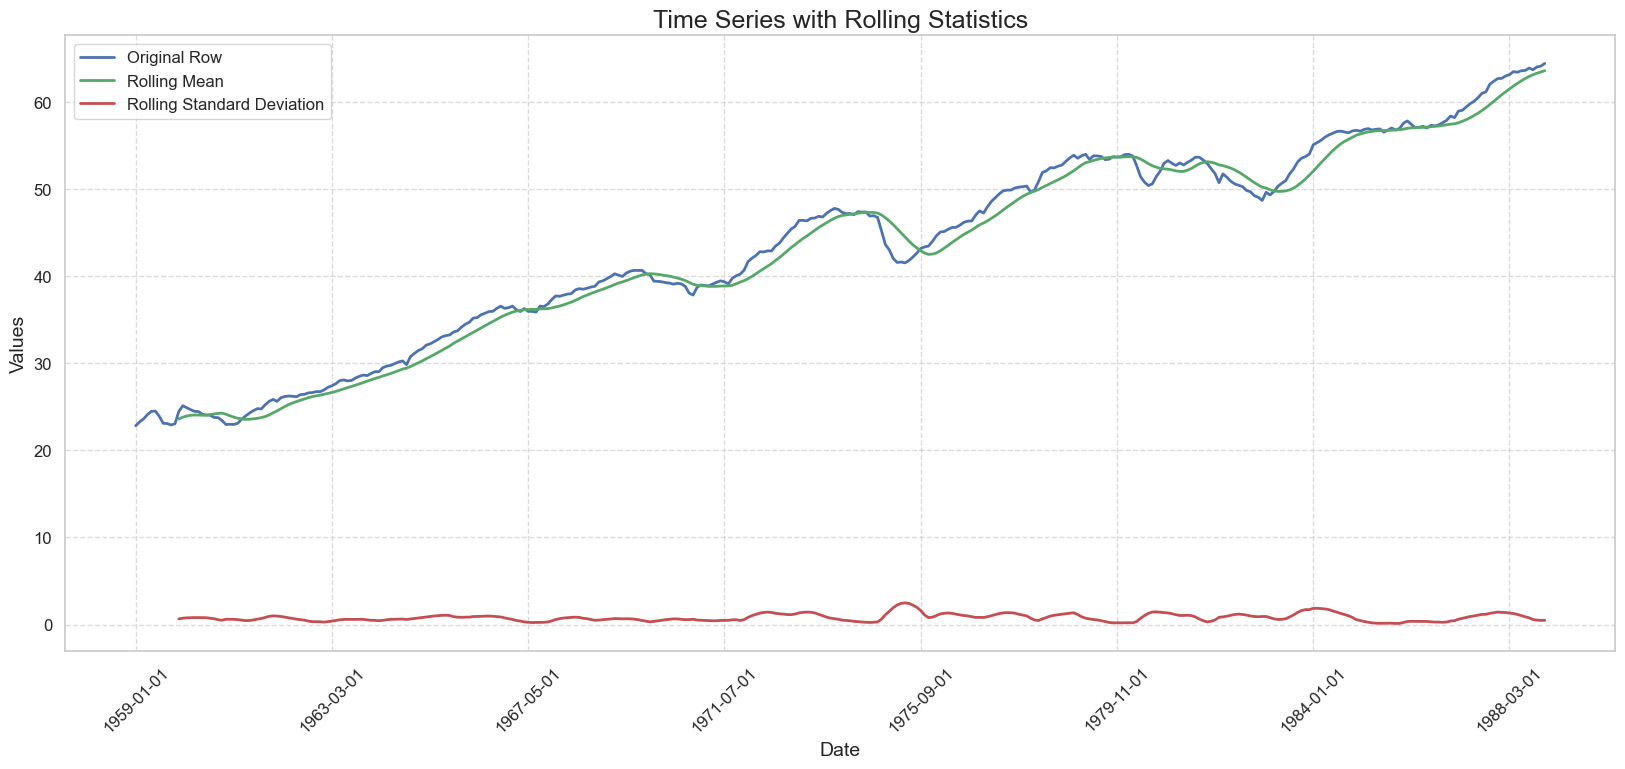

In [4]:
def stats_plot(ts):
    sns.set_theme(style="whitegrid")
    
    ts.plot(color='b', legend=True, figsize=(20, 8), label='Original Row', linewidth=2)
    ts.rolling(window=12, center=False).mean().plot(color='g', legend=True, label='Rolling Mean', linewidth=2)
    ts.rolling(window=12, center=False).std().plot(color='r', legend=True, label='Rolling Standard Deviation', linewidth=2)

    plt.title('Time Series with Rolling Statistics', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


stats_plot(ts)

### –¢–µ—Å—Ç –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ (Augmented Dickey-Fuller Test, ADF)

–§—É–Ω–∫—Ü–∏—è df_test –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Ç–µ—Å—Ç –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ (Augmented Dickey-Fuller Test, ADF) –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞. –°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Å–≤–æ–π—Å—Ç–≤–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ (—Å—Ä–µ–¥–Ω–µ–µ, –¥–∏—Å–ø–µ—Ä—Å–∏—è) –Ω–µ –∏–∑–º–µ–Ω—è—é—Ç—Å—è —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º. 

In [5]:
def df_test(ts, isPrint=True):
    sns.set_theme(style="whitegrid")

    test = sm.tsa.adfuller(ts)
    
    if isPrint:
        print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ ADF: {test[0]:.4f}")
        print(f"p-–∑–Ω–∞—á–µ–Ω–∏–µ: {test[1]:.4f}")
        print("–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è:")
        for key, value in test[4].items():
            print(f"    {key}: {value:.4f}")

    if test[0] > test[4]['5%']:
        if isPrint:
            print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç: –†—è–¥ –∏–º–µ–µ—Ç –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–æ—Ä–Ω–∏ (–Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω).")
        return False
    else:
        if isPrint:
            print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç: –†—è–¥ –Ω–µ –∏–º–µ–µ—Ç –µ–¥–∏–Ω–∏—á–Ω—ã—Ö –∫–æ—Ä–Ω–µ–π (—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω).")
        return True

df_test(ts)

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ ADF: -0.2534
p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.9319
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è:
    1%: -3.4490
    5%: -2.8697
    10%: -2.5711

–†–µ–∑—É–ª—å—Ç–∞—Ç: –†—è–¥ –∏–º–µ–µ—Ç –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–æ—Ä–Ω–∏ (–Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω).


False


–¢–µ—Å—Ç –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ ADF (-0.2534) –≤—ã—à–µ –≤—Å–µ—Ö –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –∞ p-–∑–Ω–∞—á–µ–Ω–∏–µ (0.9319) –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –æ—Å–Ω–æ–≤–∞–Ω–∏–π –¥–ª—è –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –æ –Ω–∞–ª–∏—á–∏–∏ –µ–¥–∏–Ω–∏—á–Ω—ã—Ö –∫–æ—Ä–Ω–µ–π. –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç—Ä–µ–Ω–¥—ã –∏–ª–∏ —Å–µ–∑–æ–Ω–Ω—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã –≤ –¥–∞–Ω–Ω—ã—Ö, —Ç—Ä–µ–±—É—é—â–∏–µ —É—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è. 

### –î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –Ω–∞ —Ç—Ä–µ–Ω–¥, –æ—Å—Ç–∞—Ç–∫–∏ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å

–ö–æ–¥ –Ω–∏–∂–µ –≤—ã–ø–æ–ª–Ω—è–µ—Ç –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—é –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, —Ä–∞–∑–¥–µ–ª—è—è –µ–≥–æ –Ω–∞ —Ç—Ä–∏ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞: —Ç—Ä–µ–Ω–¥ (–¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω–æ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ), —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏–µ –∫–æ–ª–µ–±–∞–Ω–∏—è) –∏ –æ—Å—Ç–∞—Ç–∫–∏ (—à—É–º). –î–ª—è —ç—Ç–æ–≥–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Ñ—É–Ω–∫—Ü–∏—è seasonal_decompose –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ statsmodels. 

In [6]:
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
decom = seasonal_decompose(data.Value)

def plot_show(x, title=''):
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(20, 4))
    sns.lineplot(x=x.index, y=x.values, linewidth=2.5, color="blue")
    plt.title(title, fontsize=18)
    plt.xlabel('–î–∞—Ç–∞', fontsize=14)
    plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

trend = decom.trend
resid = decom.resid
seasonal = decom.seasonal

### –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ —Ç—Ä–µ–Ω–¥–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞

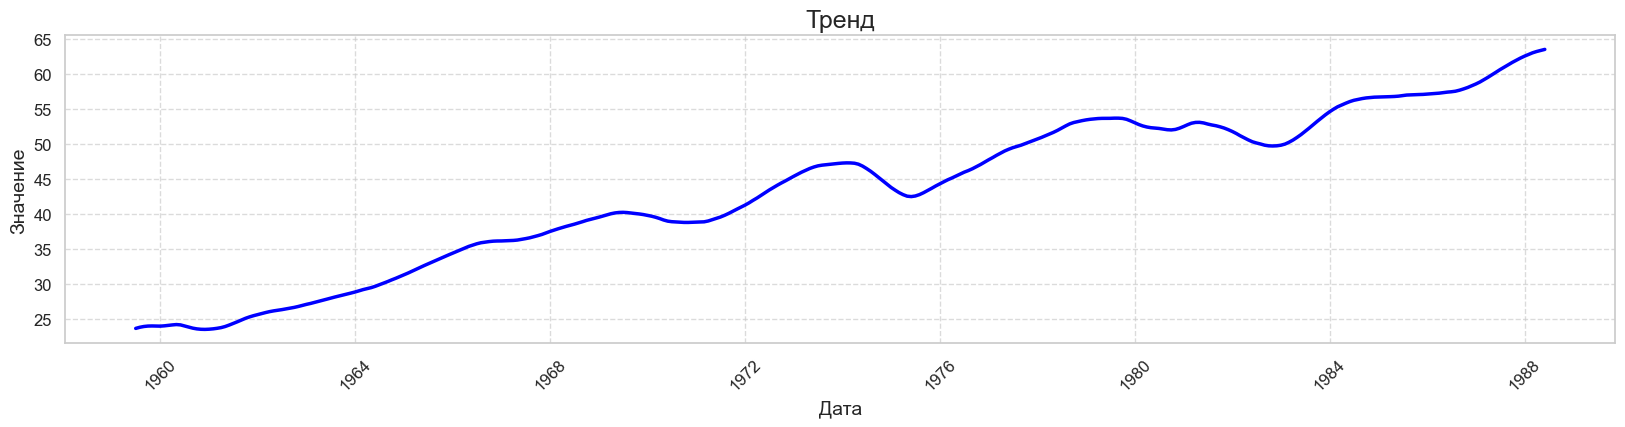

In [7]:
plot_show(trend, '–¢—Ä–µ–Ω–¥')

In [8]:
trend.dropna(inplace=True)
tsTrend = pd.Series(np.asarray(trend, dtype=np.float64), index=trend.index)

df_test(tsTrend)

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ ADF: -0.8616
p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.8004
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è:
    1%: -3.4503
    5%: -2.8703
    10%: -2.5715

–†–µ–∑—É–ª—å—Ç–∞—Ç: –†—è–¥ –∏–º–µ–µ—Ç –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–æ—Ä–Ω–∏ (–Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω).


False

### –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ –æ—Å—Ç–∞—Ç–∫–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞

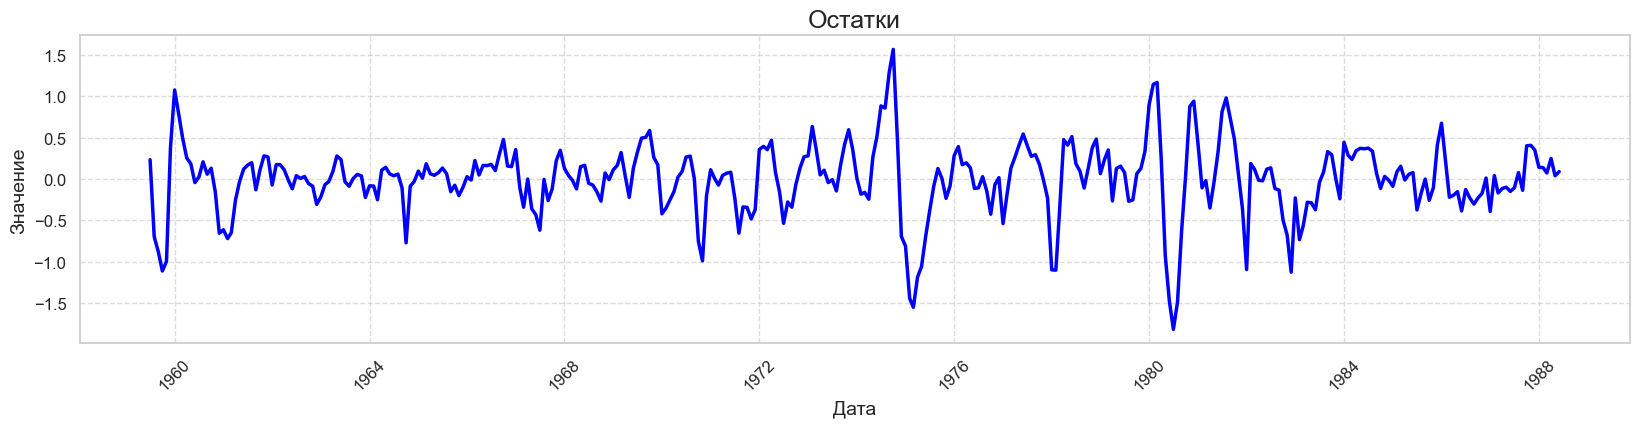

In [9]:
plot_show(resid, '–û—Å—Ç–∞—Ç–∫–∏')

In [10]:
sns.set_theme(style="whitegrid")
resid.dropna(inplace=True)

tsResid = pd.Series(np.asarray(resid, dtype=np.float64), index=resid.index)

df_test(tsResid)

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ ADF: -7.4856
p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.0000
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è:
    1%: -3.4496
    5%: -2.8700
    10%: -2.5713

–†–µ–∑—É–ª—å—Ç–∞—Ç: –†—è–¥ –Ω–µ –∏–º–µ–µ—Ç –µ–¥–∏–Ω–∏—á–Ω—ã—Ö –∫–æ—Ä–Ω–µ–π (—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω).


True

### –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞

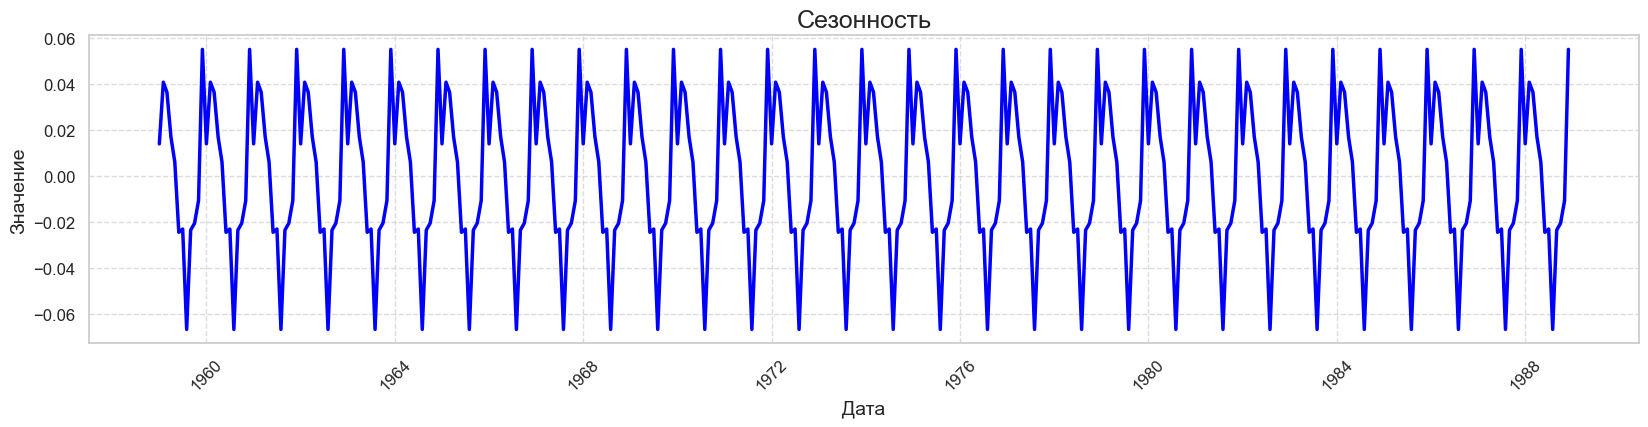

In [11]:
plot_show(seasonal, '–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å')

In [12]:
seasonal.dropna(inplace=True)
tsSeasonal = pd.Series(np.asarray(seasonal, dtype=np.float64), index=seasonal.index)
tsSeasonal.cumsum()

df_test(tsSeasonal)

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ ADF: -505109009984783.8125
p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.0000
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è:
    1%: -3.4493
    5%: -2.8699
    10%: -2.5712

–†–µ–∑—É–ª—å—Ç–∞—Ç: –†—è–¥ –Ω–µ –∏–º–µ–µ—Ç –µ–¥–∏–Ω–∏—á–Ω—ã—Ö –∫–æ—Ä–Ω–µ–π (—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω).


True

### –í—ã–≤–æ–¥—ã:

–í —Ö–æ–¥–µ –∞–Ω–∞–ª–∏–∑–∞ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ç–µ—Å—Ç–∞ –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ –∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –±—ã–ª–æ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ —Å–ª–µ–¥—É—é—â–µ–µ:

##### –¢—Ä–µ–Ω–¥: 
–¢–µ—Å—Ç –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ —Ç—Ä–µ–Ω–¥ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º, —Ç–∞–∫ –∫–∞–∫ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ ADF –ø—Ä–µ–≤—ã—à–∞–µ—Ç –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è, –∞ p-–∑–Ω–∞—á–µ–Ω–∏–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –≤—ã—à–µ –¥–æ–ø—É—Å—Ç–∏–º–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ (–æ–±—ã—á–Ω–æ —ç—Ç–æ 0.05).

##### –û—Å—Ç–∞—Ç–∫–∏: 
–û—Å—Ç–∞—Ç–∫–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º–∏.

##### –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å: 
–°–µ–∑–æ–Ω–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–∞. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏–µ –∫–æ–ª–µ–±–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö —Å—Ç–∞–±–∏–ª—å–Ω—ã –∏ –Ω–µ –∑–∞–≤–∏—Å—è—Ç –æ—Ç –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Å–¥–≤–∏–≥–∞.

### –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Ä—è–¥–∫–∞ –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞

–§—É–Ω–∫—Ü–∏—è ord_int –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π –¥–ª—è –µ–≥–æ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏. –≠—Ç–æ –≤–∞–∂–Ω—ã–π —à–∞–≥ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –º–æ–¥–µ–ª–∏ ARIMA, –≥–¥–µ –ø–∞—Ä–∞–º–µ—Ç—Ä d (–ø–æ—Ä—è–¥–æ–∫ –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏–∏) —É–∫–∞–∑—ã–≤–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –Ω—É–∂–Ω–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞—Ç—å —Ä—è–¥, —á—Ç–æ–±—ã –æ–Ω —Å—Ç–∞–ª —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.

In [13]:
def ord_int(ts, prn=True):
    d = 0  

    while not df_test(ts, isPrint=False):  
        ts = ts.diff(periods=1).dropna()  
        d += 1

    if prn:
        print(f"–ü–æ—Ä—è–¥–æ–∫ –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏–∏: {d}")
        if d == 0:
            print("–†—è–¥ —É–∂–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω, –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è.")
        else:
            print(f"–†—è–¥ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º –ø–æ—Å–ª–µ {d} –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.")
    
    return d


k = ord_int(ts)

–ü–æ—Ä—è–¥–æ–∫ –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏–∏: 1
–†—è–¥ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º –ø–æ—Å–ª–µ 1 –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.


### –ê–Ω–∞–ª–∏–∑ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ (ACF –∏ PACF)

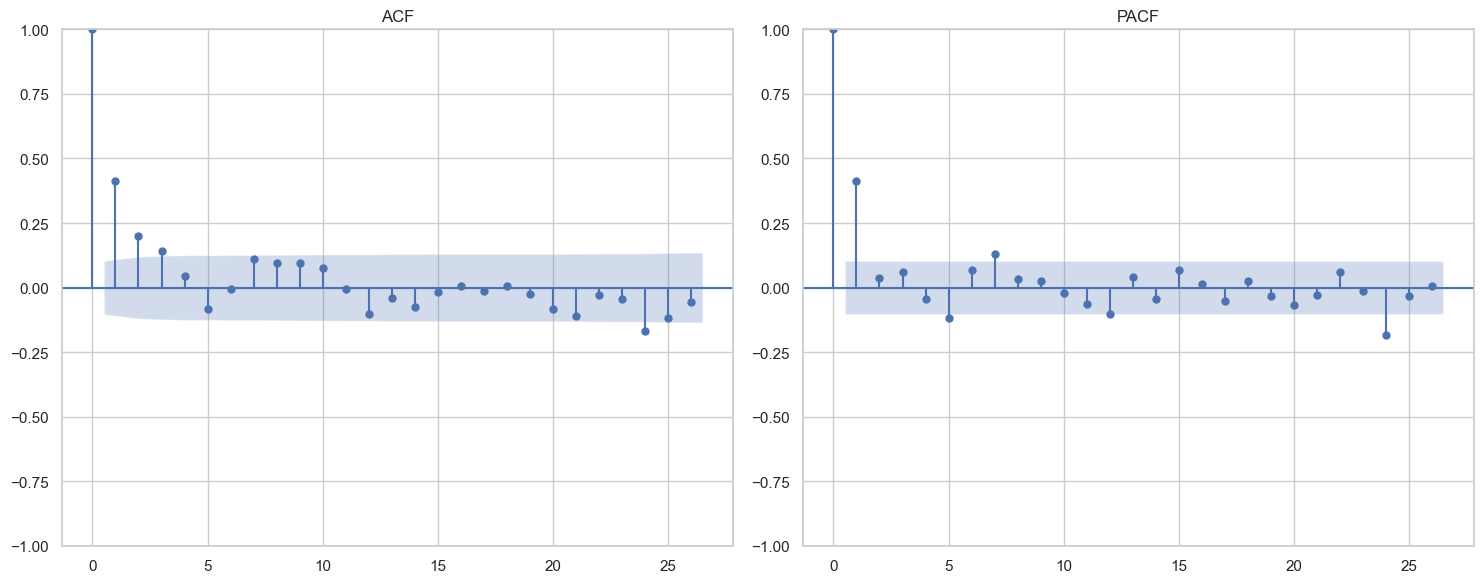

In [14]:
log_shift_ts = (np.log(ts) - np.log(ts).shift())
log_shift_ts.dropna(inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  

plot_acf(log_shift_ts, ax=axes[0])
axes[0].set_title('ACF')

plot_pacf(log_shift_ts, ax=axes[1], method='ols')
axes[1].set_title('PACF')

plt.tight_layout() 
plt.show()

### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–¥–µ–ª–∏ ARIMA —Å —Ä–∞–∑–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ (p, d, q) –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–í –∫–æ–¥–µ —ç—Ç–æ–π —á–∞—Å—Ç–∏ –æ–±—É—á–∞—é—Ç—Å—è —Ç—Ä–∏ –º–æ–¥–µ–ª–∏ ARIMA —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ (p, d, q) –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å—Ç—Ä–æ—è—Ç—Å—è –∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –î–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –æ—Ç–æ–±—Ä–∞–∂–∞—é—Ç—Å—è –µ—ë –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –†–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ (RMSE –∏ R¬≤) –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏.

In [15]:
warnings.filterwarnings('ignore')

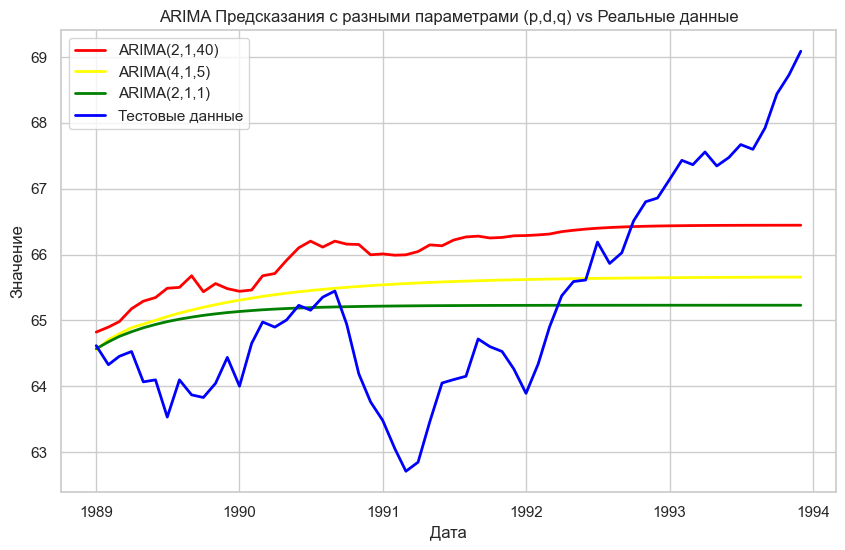

–ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π:
ARIMA(2,1,40) - RMSE: 1.5670, R^2: -0.0143, AIC: 277.7139
ARIMA(4,1,5) - RMSE: 1.4746, R^2: 0.1018, AIC: 259.3072
ARIMA(2,1,1) - RMSE: 1.5207, R^2: 0.0448, AIC: 256.8546


In [16]:
train_df = pd.read_csv('training.csv', parse_dates=['Date'], index_col='Date')
test_df = pd.read_csv('testing.csv', parse_dates=['Date'], index_col='Date')

train_df = train_df.interpolate(method='linear')
test_df = test_df.interpolate(method='linear')

params = [(2, 1, 40), (4, 1, 5), (2, 1, 1)] 

metrics = []

plt.figure(figsize=(10, 6))

colors = ['red', 'yellow', 'green']  

for idx, (p, d, q) in enumerate(params):

    model = ARIMA(train_df['Value'], order=(p, d, q))
    model_fit = model.fit()
    
    pred = model_fit.predict(start=len(train_df), end=len(train_df) + len(test_df) - 1, typ='levels')
    
    rmse = np.sqrt(mean_squared_error(test_df['Value'], pred))
    r2 = r2_score(test_df['Value'], pred)
    
    aic = model_fit.aic
    
    metrics.append((p, d, q, rmse, r2, aic))
    
    plt.plot(test_df.index, pred, label=f'ARIMA({p},{d},{q})', color=colors[idx], linestyle='-', lw=2)

plt.plot(test_df.index, test_df['Value'], label='–¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ', color='blue', linewidth=2)

plt.title('ARIMA –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å —Ä–∞–∑–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ (p,d,q) vs –†–µ–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
plt.legend()
plt.grid(True)
plt.show()

print("–ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π:")
for p, d, q, rmse, r2, aic in metrics:
    print(f'ARIMA({p},{d},{q}) - RMSE: {rmse:.4f}, R^2: {r2:.4f}, AIC: {aic:.4f}')

### –í—ã–±–æ—Ä –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–Ω–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è –ê–∫–∞–∏–∫–µ

–î–ª—è –≤—ã–±–æ—Ä–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ ARIMA –Ω–∞ –æ—Å–Ω–æ–≤–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è –ê–∫–∞–∏–∫–µ (AIC) –Ω—É–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–≤–æ–π—Å—Ç–≤–æ, —á—Ç–æ –º–æ–¥–µ–ª—å —Å –º–µ–Ω—å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º AIC —Å—á–∏—Ç–∞–µ—Ç—Å—è –±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–µ–π –¥–ª—è –¥–∞–Ω–Ω—ã—Ö.

–êIC –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–∞–∫:

ùê¥ùêºùê∂ = ‚àí2‚ãÖlog(ùêø)+2ùëò  

ùêø ‚Äî –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è –º–æ–¥–µ–ª–∏.

ùëò ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ –º–æ–¥–µ–ª–∏ (–≤–∫–ª—é—á–∞—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ã AR, I, MA).

In [17]:
best_model_aic = min(metrics, key=lambda x: x[5]) 
print(f'\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ AIC: ARIMA({best_model_aic[0]},{best_model_aic[1]},{best_model_aic[2]}) —Å AIC = {best_model_aic[5]:.4f}')

best_model_r2 = max(metrics, key=lambda x: x[4])  
print(f'–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ R¬≤: ARIMA({best_model_r2[0]},{best_model_r2[1]},{best_model_r2[2]}) —Å R¬≤ = {best_model_r2[4]:.4f}')

p, d, q = best_model_aic[0], best_model_aic[1], best_model_aic[2]
model_aic = ARIMA(train_df['Value'], order=(p, d, q))
model_aic_fit = model_aic.fit()
pred_aic = model_aic_fit.predict(start=len(train_df), end=len(train_df) + len(test_df) - 1, typ='levels')

rmse_best_aic = np.sqrt(mean_squared_error(test_df['Value'], pred_aic))
r2_best_aic = r2_score(test_df['Value'], pred_aic)

print(f'\nRMSE –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ AIC: {rmse_best_aic:.4f}')
print(f'R¬≤ –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ AIC: {r2_best_aic:.4f}')

p, d, q = best_model_r2[0], best_model_r2[1], best_model_r2[2]
model_r2 = ARIMA(train_df['Value'], order=(p, d, q))
model_r2_fit = model_r2.fit()
pred_r2 = model_r2_fit.predict(start=len(train_df), end=len(train_df) + len(test_df) - 1, typ='levels')

rmse_best_r2 = np.sqrt(mean_squared_error(test_df['Value'], pred_r2))
r2_best_r2 = r2_score(test_df['Value'], pred_r2)

print(f'\nRMSE –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ R¬≤: {rmse_best_r2:.4f}')
print(f'R¬≤ –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ R¬≤: {r2_best_r2:.4f}')


–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ AIC: ARIMA(2,1,1) —Å AIC = 256.8546
–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ R¬≤: ARIMA(4,1,5) —Å R¬≤ = 0.1018

RMSE –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ AIC: 1.5207
R¬≤ –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ AIC: 0.0448

RMSE –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ R¬≤: 1.4746
R¬≤ –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ R¬≤: 0.1018


### –í—ã–≤–æ–¥—ã –ø–æ —Ä–∞–±–æ—Ç–µ

–í —Ö–æ–¥–µ –∞–Ω–∞–ª–∏–∑–∞ –±—ã–ª–∏ –æ–±—É—á–µ–Ω—ã –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π ARIMA —Å —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (p, d, q). –î–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –±—ã–ª–∏ –≤—ã—á–∏—Å–ª–µ–Ω—ã –º–µ—Ç—Ä–∏–∫–∏ RMSE, R¬≤ –∏ AIC, —á—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ –æ—Ü–µ–Ω–∏—Ç—å –∏—Ö –∫–∞—á–µ—Å—Ç–≤–æ —Å —Ä–∞–∑–Ω—ã—Ö —Å—Ç–æ—Ä–æ–Ω. 
–ú–æ–¥–µ–ª–∏ –±—ã–ª–∏ –æ—Ü–µ–Ω–µ–Ω—ã –ø–æ –¥–≤—É–º –∫—Ä–∏—Ç–µ—Ä–∏—è–º: AIC (–¥–ª—è –≤—ã–±–æ—Ä–∞ –º–æ–¥–µ–ª–∏ —Å –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π —Å–ª–æ–∂–Ω–æ—Å—Ç—å—é –∏ –ø—Ä–∏ —ç—Ç–æ–º –Ω–∞–∏–ª—É—á—à–∏–º –∫–∞—á–µ—Å—Ç–≤–æ–º) –∏ R¬≤ (–¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç–æ–≥–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ –º–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç –¥–∞–Ω–Ω—ã–µ). 
–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –±—ã–ª–∏ –≤—ã–±—Ä–∞–Ω—ã –ª—É—á—à–∏–µ –º–æ–¥–µ–ª–∏ –ø–æ AIC –∏ –ø–æ R¬≤.